### 量子加法器
上面放量子占用量子比特条数多的，下面部分放置量子比特条数小的

In [29]:
from qiskit import BasicAer,execute
from time import time
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister
from pprint import pprint
import pixiedust
from quantum_logic_operation import quantum_adder

In [30]:
adder_fir_qbit=3
adder_sec_qbit=2
assist_qbit=2
all_qbit=adder_sec_qbit+adder_fir_qbit+assist_qbit
q_fir = QuantumRegister(adder_fir_qbit, 'fir')
q_sec=QuantumRegister(adder_sec_qbit,'sec')
q_ass=QuantumRegister(assist_qbit,'ass')
circuit = QuantumCircuit()
cr = ClassicalRegister(all_qbit, 'cr')

circuit.add_register(q_fir)
circuit.add_register(q_sec)
circuit.add_register(q_ass)
all_component_lst=[q_fir,q_sec,q_ass]
qbit_lst=[]
for _ in all_component_lst:
    for i in range(_.size):
        qbit_lst.append(_[i])
pprint(qbit_lst)

[(QuantumRegister(3, 'fir'), 0),
 (QuantumRegister(3, 'fir'), 1),
 (QuantumRegister(3, 'fir'), 2),
 (QuantumRegister(2, 'sec'), 0),
 (QuantumRegister(2, 'sec'), 1),
 (QuantumRegister(2, 'ass'), 0),
 (QuantumRegister(2, 'ass'), 1)]


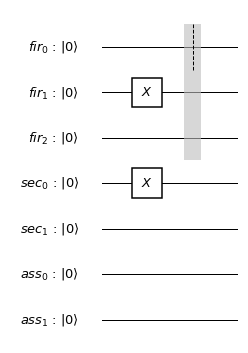

In [31]:
fir_num = 2
sec_num =2
fir_str = bin(fir_num)[2:].zfill(adder_fir_qbit)
sec_str = bin(sec_num)[2:].zfill(adder_sec_qbit)
num_str = fir_str + sec_str
for i in range(len(num_str)):
    if num_str[i] == '1':
        circuit.x(qbit_lst[i])
circuit.barrier()
circuit.draw(output='mpl')

In [32]:
quantum_adder(circuit, qbit_lst, adder_fir_qbit, adder_sec_qbit)

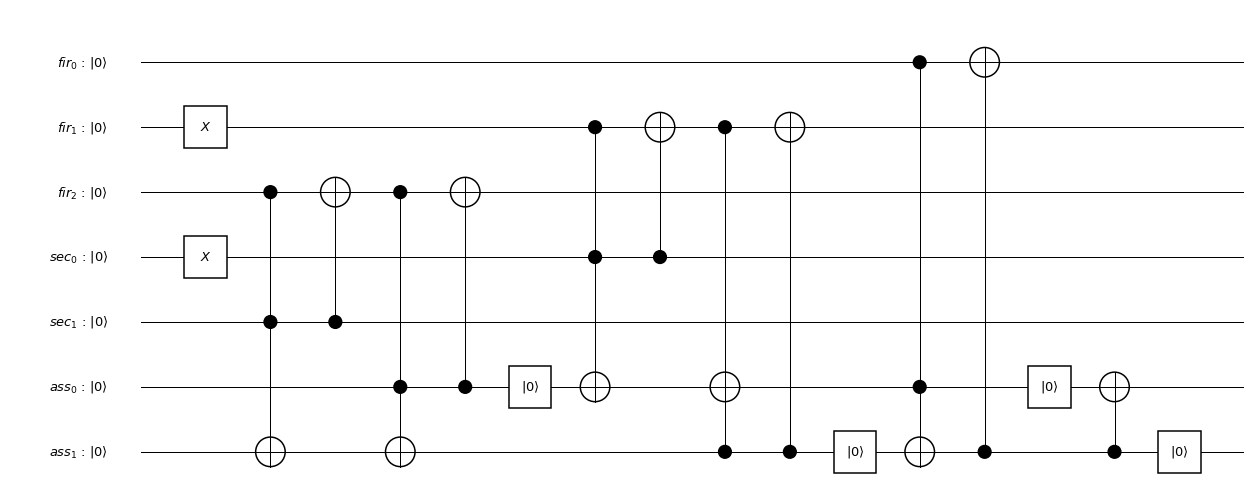

In [33]:
circuit.draw(
    output='mpl', scale=1, plot_barriers=False, filename='circuit-debug')

In [34]:
circuit.add_register(cr)
for _ in range(all_qbit):
    circuit.measure(qbit_lst[_],cr[_])
backend=BasicAer.get_backend('qasm_simulator')
result=execute(circuit,backend,shots=1).result()
counts=result.get_counts(circuit)
all_lst=list(counts.keys())
print(all_lst)

['0001000']
